In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('C:\\Users\\54115\\Desktop\\BIG DATA\\Python\\exposicion\\precio_pan_deflactado.xlsx')
df=df.round(2)
df['Mes'] = df['Mes'].replace({
    "Enero":"January","Enero " :"January",
    'Febrero': 'February',"Marzo":"March",
    'Abril': 'April',"Mayo":"May","Junio":"June","Julio":"July","Agosto":"August",
    "Septiembre":"September","Octubre":"October","Noviembre":"November","Diciembre":"December"
})

In [3]:
df['month_number'] = pd.to_datetime(df['Mes'], format='%B').dt.month
df['month_year'] = df['month_number'].astype(str).str.zfill(2) + '/' + df["Año"].astype(str)
df['Precio deflactado'] = df['Precio deflactado'].replace({"-":38.64})
df["month_year"]=pd.to_datetime(df["month_year"], format="%m/%Y")
df["Precio deflactado"]=df["Precio deflactado"].round(2)
df

,Año,Mes,Pan francés(kg),IPC mensual,Índice IPC,IPC (base junio 2017 = 100),Precio deflactado,month_number,month_year
0,2017,June,38.64,-,100.00,100,38.64,6,2017-06-01
1,2017,July,39.12,1.7,101.70,100,38.47,7,2017-07-01
2,2017,August,39.43,1.4,103.12,100,38.24,8,2017-08-01
3,2017,September,39.71,1.9,105.08,100,37.79,9,2017-09-01
4,2017,October,39.89,1.5,106.66,100,37.40,10,2017-10-01
...,...,...,...,...,...,...,...,...,...
89,2024,November,3040.97,2.4,6678.45,100,45.53,11,2024-11-01
90,2024,December,3095.49,2.7,6858.77,100,45.13,12,2024-12-01
91,2025,January,3154.17,2.2,7009.66,100,45.00,1,2025-01-01
92,2025,February,3212.93,2.4,7177.89,100,44.76,2,2025-02-01


Text(0.5, 1.0, 'Diciembre-Abril , 2017-2025')

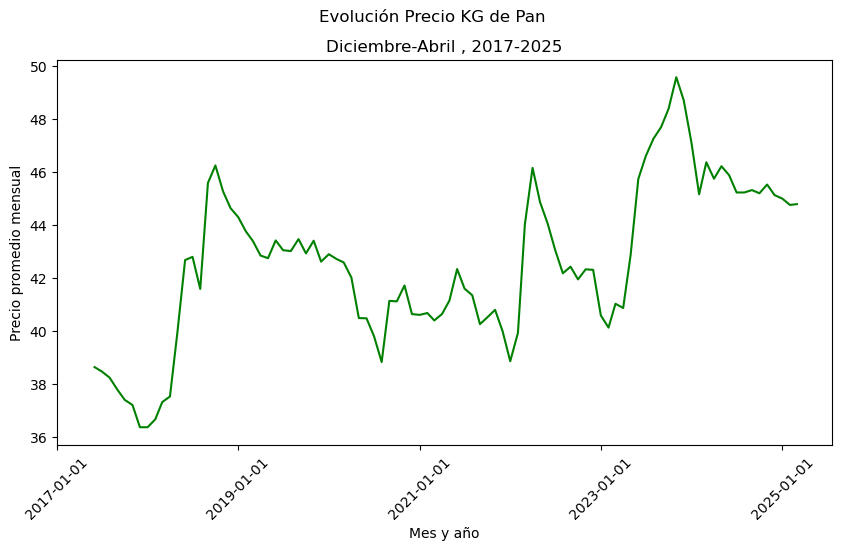

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df['month_year'], df["Precio deflactado"], linestyle='-', color='green')
plt.xticks(ticks=plt.xticks()[0][::2])
plt.xticks(rotation=45)
plt.suptitle('Evolución Precio KG de Pan')
plt.xlabel('Mes y año')
plt.ylabel('Precio promedio mensual')
plt.title('Diciembre-Abril , 2017-2025')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
df["Precio deflactado"]

0     38.64
1     38.47
2     38.24
3     37.79
4     37.40
      ...  
89    45.53
90    45.13
91    45.00
92    44.76
93    44.79
Name: Precio deflactado, Length: 94, dtype: float64

In [39]:
df["precio_1"] = df["Precio deflactado"].shift(1, fill_value=0)
df["precio_2"] = df["Precio deflactado"].shift(2, fill_value=0)
df["precio_3"] = df["Precio deflactado"].shift(3, fill_value=0)
df["precio_4"] = df["Precio deflactado"].shift(4, fill_value=0)
df["precio_5"] = df["Precio deflactado"].shift(5, fill_value=0)
df['intercepto'] = 1
df["precio_1"].replace([np.nan, np.inf, -np.inf], 0, inplace=True)
df["Precio deflactado"].replace([np.nan, np.inf, -np.inf], 0, inplace=True)
x=df[["precio_1","precio_2","precio_3","precio_4","precio_5","intercepto"]]
y=df[["Precio deflactado"]]
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Precio deflactado   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     12.91
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           2.15e-09
Time:                        18:40:40   Log-Likelihood:                -206.12
No. Observations:                  93   AIC:                             424.2
Df Residuals:                      87   BIC:                             439.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
precio_1       0.2993      0.075      3.975      0.0

C:\Users\54115\AppData\Local\Temp\ipykernel_12432\3492074664.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["precio_1"].replace([np.nan, np.inf, -np.inf], 0, inplace=True)
C:\Users\54115\AppData\Local\Temp\ipykernel_12432\3492074664.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

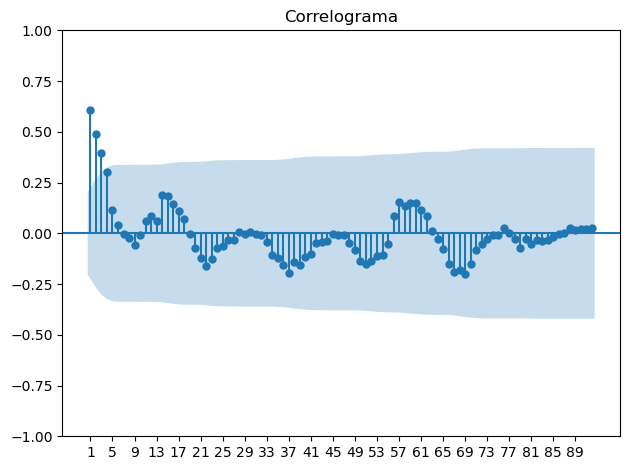

In [52]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

residuals = results.resid

fig, ax = plt.subplots()
plot_acf(residuals.squeeze(), lags=92, ax=ax, zero=False)
ax.set_xticks(range(1, 92, 4))
ax.set_title('Correlograma',fontsize=12)
plt.tight_layout()
plt.savefig("correlograma.png", dpi=300)
plt.show()

In [8]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(results.resid)
print("Durbin-Watson:", dw)

Durbin-Watson: 0.5439372762068908


In [54]:
# Creamos un dummy para capturar la estacionalidad cada 6 meses.

df = df.sort_values("month_year")
df["mes_nro"] = range(len(df))
df["dummy_seis_meses"] = (df["mes_nro"] % 6 == 0).astype(int)

In [55]:
# Separamos en datos de entrenamiento y testeo
# Datos de entrenamiento (2017-2023)

df_train = df[df['month_year'] < '2024-01-01'].copy()

# Datos de testeo (2024 en adelante)

df_test = df[df['month_year'] >= '2024-01-01'].copy()

In [56]:
df.loc[:, 'precio_real_pan'] = pd.to_numeric(df['Precio deflactado'], errors='coerce')

# Creamos la variable rezagada (lag) de pan en t-1.
df.loc[:, 'pan_t_menos_1'] = df['precio_real_pan'].shift(1)
df = df.dropna(subset=['precio_real_pan', 'pan_t_menos_1'])
df_train = df[df['month_year'] < '2024-01-01'].copy()

# Creamos las variables
X = df_train[['pan_t_menos_1']]
y = df_train['precio_real_pan']

modelo = LinearRegression()
modelo.fit(X, y)
print("Intercepto (β0):", modelo.intercept_)
print("Coeficiente (β1):", modelo.coef_[0])

Intercepto (β0): 2.506991999432998
Coeficiente (β1): 0.9433859163614474


In [70]:
X = X.drop(columns=['mes'], errors='ignore')
df['pan_t_menos_1'] = pd.to_numeric(df['pan_t_menos_1'], errors='coerce')
mes_dummies = pd.get_dummies(df['Mes'], prefix='Mes', drop_first=True).astype(int)
X = pd.concat([df[['pan_t_menos_1']], mes_dummies], axis=1)
X = X.dropna()

In [71]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

columnas_predictoras = ['pan_t_menos_1'] + [col for col in df.columns if col.startswith('Mes_')]

X = df_train[columnas_predictoras]
y = df_train['precio_real_pan']
X = X.dropna()
y = y.loc[X.index]

modelo_lasso_cv = make_pipeline(
    StandardScaler(),
    LassoCV(cv=5, random_state=42)
)

# Entrenamos el modelo
modelo_lasso_cv.fit(X, y)

# Buscamos cuál es el mejor alpha para nuestro modelo
alpha_optimo = modelo_lasso_cv.named_steps['lassocv'].alpha_
print(alpha_optimo.round(7))

0.0026188
